In [481]:
import sqlite3
import pandas as pd
import datetime
import re
from collections import Counter
import seaborn as sns

In [425]:
connection = sqlite3.connect("../data/twitter.db")
crsr = connection.cursor()

In [426]:
df_tweets = pd.read_sql('SELECT * FROM tweets', connection, parse_dates=['created_at'])
df_users = pd.read_sql('SELECT * FROM users', connection)

In [427]:
df_tweets.head()

,id,text,author_id,created_at,retweet_count,reply_count,like_count,quote_count
0,1578613094191796224,"Gente muy agradable en @TheBridge_Tech , te ri...",1578095844569514011,2022-10-08 05:07:45,0,0,0,0
1,1577334577701453827,Recordaros que la semana que viene tenemos la ...,1003872445,2022-10-04 16:27:23,2,0,12,0
2,1576902991507922944,El desarrollador web es uno de los perfiles má...,2529499620,2022-10-03 11:52:25,3,0,3,0
3,1576856703349374976,@jorgegrev @TheBridge_Tech Enhorabuena crack!,706520411551494145,2022-10-03 08:48:29,0,0,1,0
4,1575217357105946624,Hoy por fin ve la luz mi primer Case Study púb...,604485175,2022-09-28 20:14:18,3,0,4,0


In [428]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             154 non-null    object        
 1   text           154 non-null    object        
 2   author_id      154 non-null    object        
 3   created_at     154 non-null    datetime64[ns]
 4   retweet_count  154 non-null    int64         
 5   reply_count    154 non-null    int64         
 6   like_count     154 non-null    int64         
 7   quote_count    154 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 9.8+ KB


In [429]:
df_users.head()

,id,name,username
0,1578095844569514011,Rocket,75_Rocket_
1,1003872445,Pau Mugarra,PauMugarra
2,2529499620,Formación Fundación Universidad Carlos III,formacion_fuc3
3,706520411551494145,JoseSola,Jose_Sola_
4,604485175,Berta Otero,bertinha84


In [430]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        82 non-null     object
 1   name      82 non-null     object
 2   username  82 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB


In [431]:
df_tweets['year'] = df_tweets['created_at'].dt.year
df_tweets['month'] = df_tweets['created_at'].dt.month
df_tweets['day'] = df_tweets['created_at'].dt.day
df_tweets['time'] = df_tweets['created_at'].dt.time

In [432]:
print('The Bridge school has been mentioned a total of ' + str(len(df_tweets)) + ' times since 13th of June.')

The Bridge school has been mentioned a total of 154 times since 13th of June.


In [433]:
# The column social_repercussion contains the sum of the 4 metrics columns
df_tweets['total_interactions'] = df_tweets['retweet_count'] + df_tweets['reply_count'] + df_tweets['like_count'] + df_tweets['quote_count']

# Row which contains tweet with most repercussion information
tweet_most_repercussion = df_tweets[df_tweets['total_interactions']==df_tweets['total_interactions'].max()]
tweet_most_repercussion

,id,text,author_id,created_at,retweet_count,reply_count,like_count,quote_count,year,month,day,time,total_interactions
6,1573246948693651456,Y seguimos con lo prometido: Primera quedada ...,1003872445,2022-09-23 09:44:36,7,0,20,4,2022,9,23,09:44:36,31


In [434]:
def printed_text(feature):
    return tweet_most_repercussion[feature].values[0]

In [435]:
def get_user_name(id):
    return df_users[df_users['id'] == id]['name'].values[0]

In [436]:
print('The tweet with most social repercussion was:\nText: ', printed_text('text'),
      '\nAuthor name: ', get_user_name(printed_text('author_id')),
      '\nDate: ', printed_text('day'), '/', printed_text('month'), '/', printed_text('year'),
      '\nTotal interactions: ', printed_text('total_interactions'),
      '\nRetweet count: ', printed_text('retweet_count'),
      '\nReply count: ', printed_text('reply_count'),
      '\nLike count: ', printed_text('like_count'),
      '\nQuote count: ', printed_text('quote_count'),)

The tweet with most social repercussion was:
Text:  Y seguimos con lo prometido:  Primera quedada de la comunidad #CPS en Madrid 🚀: https://t.co/xnWjKu6fPi en un espacio cedido por @TheBridge_Tech. 
Author name:  Pau Mugarra 
Date:  23 / 9 / 2022 
Total interactions:  31 
Retweet count:  7 
Reply count:  0 
Like count:  20 
Quote count:  4


In [437]:
# User with most tweets
most_repeated_user = df_tweets['author_id'].value_counts().idxmax()

# Times this user posted
times_user_repeated = df_tweets['author_id'].value_counts()[most_repeated_user]

In [438]:
# Row which contains author information
df_users[df_users['id'] == most_repeated_user]

,id,name,username
48,1255794072280842240,Heavy Mental,HeavyMental_es


In [439]:
print('The user with most tweets was:\nName: ', get_user_name(most_repeated_user),
      '\nNumber of tweets: ', times_user_repeated)

The user with most tweets was:
Name:  Heavy Mental 
Number of tweets:  12


In [440]:
month_with_most_tweets = df_tweets['month'].value_counts().idxmax()

datetime_object = datetime.datetime.strptime(str(month_with_most_tweets), "%m")
month_name = datetime_object.strftime("%B")

In [441]:
print('Most of the tweets were done in', month_name)

Most of the tweets were done in June


In [442]:
Counter(" ".join(df_tweets["text"]).split()).most_common(100)

[('de', 172),
 ('@TheBridge_Tech', 135),
 ('en', 92),
 ('la', 85),
 ('y', 66),
 ('@HeavyMental_es', 65),
 ('el', 63),
 ('a', 62),
 ('que', 53),
 ('@GuillermoDeHaro', 51),
 ('@Recuenco', 50),
 ('para', 39),
 ('@_miki', 32),
 ('@DavidAlayon', 30),
 ('por', 28),
 ('un', 26),
 ('con', 25),
 ('las', 22),
 ('del', 21),
 ('se', 19),
 ('una', 18),
 ('no', 18),
 ('los', 17),
 ('es', 15),
 ('lo', 13),
 ('nos', 12),
 ('@Mulder01198676', 12),
 ('más', 11),
 ('pero', 10),
 ('@Alienta', 10),
 ('te', 9),
 ('El', 9),
 ('al', 9),
 ('talento', 9),
 ('convenio', 9),
 ('formación', 9),
 ('@uriondo', 9),
 ('primera', 8),
 ('@TheBridge_Tech,', 8),
 ('si', 8),
 ('La', 8),
 ('ya', 8),
 ('@JotDownSpain', 8),
 ('vida', 7),
 ('Si', 7),
 ('gracias', 7),
 ('ha', 7),
 ('sobre', 7),
 ('sus', 7),
 ('the', 7),
 ('Gracias', 7),
 ('@moquintana', 7),
 ('Hoy', 6),
 ('o', 6),
 ('Y', 6),
 ('entre', 6),
 ('and', 6),
 ('profesionales', 6),
 ('#ciberseguridad', 6),
 ('No', 6),
 ('@PauMugarra', 6),
 ('va', 5),
 ('hacer', 5),
 (

In [443]:
from nltk.corpus import stopwords
stop = stopwords.words('spanish')
df_tweets['text_without_stopwords'] = df_tweets['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [444]:
Counter(" ".join(df_tweets["text_without_stopwords"]).split()).most_common(100)

[('@TheBridge_Tech', 135),
 ('@HeavyMental_es', 65),
 ('@GuillermoDeHaro', 51),
 ('@Recuenco', 50),
 ('@_miki', 32),
 ('@DavidAlayon', 30),
 ('@Mulder01198676', 12),
 ('@Alienta', 10),
 ('El', 9),
 ('talento', 9),
 ('convenio', 9),
 ('formación', 9),
 ('@uriondo', 9),
 ('primera', 8),
 ('@TheBridge_Tech,', 8),
 ('si', 8),
 ('La', 8),
 ('@JotDownSpain', 8),
 ('vida', 7),
 ('Si', 7),
 ('gracias', 7),
 ('the', 7),
 ('Gracias', 7),
 ('@moquintana', 7),
 ('Hoy', 6),
 ('Y', 6),
 ('and', 6),
 ('profesionales', 6),
 ('#ciberseguridad', 6),
 ('No', 6),
 ('@PauMugarra', 6),
 ('va', 5),
 ('hacer', 5),
 ('ser', 5),
 ('@TheBridge_Tech.', 5),
 ('Data', 5),
 ('demanda', 5),
 ('unen', 5),
 ('nuevo', 5),
 ('firman', 5),
 ('aceleradora', 5),
 ('millones', 5),
 ('euros', 5),
 ('ronda', 5),
 ('directo', 5),
 ('Que', 5),
 ('@joobid', 5),
 ('@Atorrerus', 5),
 ('@joansabater', 5),
 ('@PesetJairo', 5),
 ('@adriskou', 5),
 ('@estodopornada', 5),
 ('Bootcamp', 4),
 ('buena', 4),
 ('#bootcamp', 4),
 ('Un', 4),
 

In [445]:
df_tweets['text_without_articles'] = df_tweets['text_without_stopwords'].apply(lambda x: x.lower())

In [463]:
def removearticles(text):
  text = re.sub('\s+(la|el|si|y|the|and|que|.|#)(\s+)', '\2', text)
  return text

In [464]:
def process_string(text):
    text = re.sub(r"\@\w+[,]|\@\w+|[,]\@\w+", "", text)
    return text

In [465]:
df_tweets['text_without_articles'] = df_tweets['text_without_articles'].apply(lambda x: removearticles(x))
df_tweets['text_without_articles'] = df_tweets['text_without_articles'].apply(lambda x: process_string(x))

In [478]:
most_repeated = Counter(" ".join(df_tweets["text_without_articles"]).split()).most_common(100)

In [479]:
most_repeated = most_repeated[:10]

In [480]:
most_repeated

[('gracias', 11),
 ('talento', 10),
 ('hoy', 9),
 ('convenio', 9),
 ('formación', 9),
 ('vida', 7),
 ('bootcamp', 7),
 ('primera', 6),
 ('data', 6),
 ('profesionales', 6)]

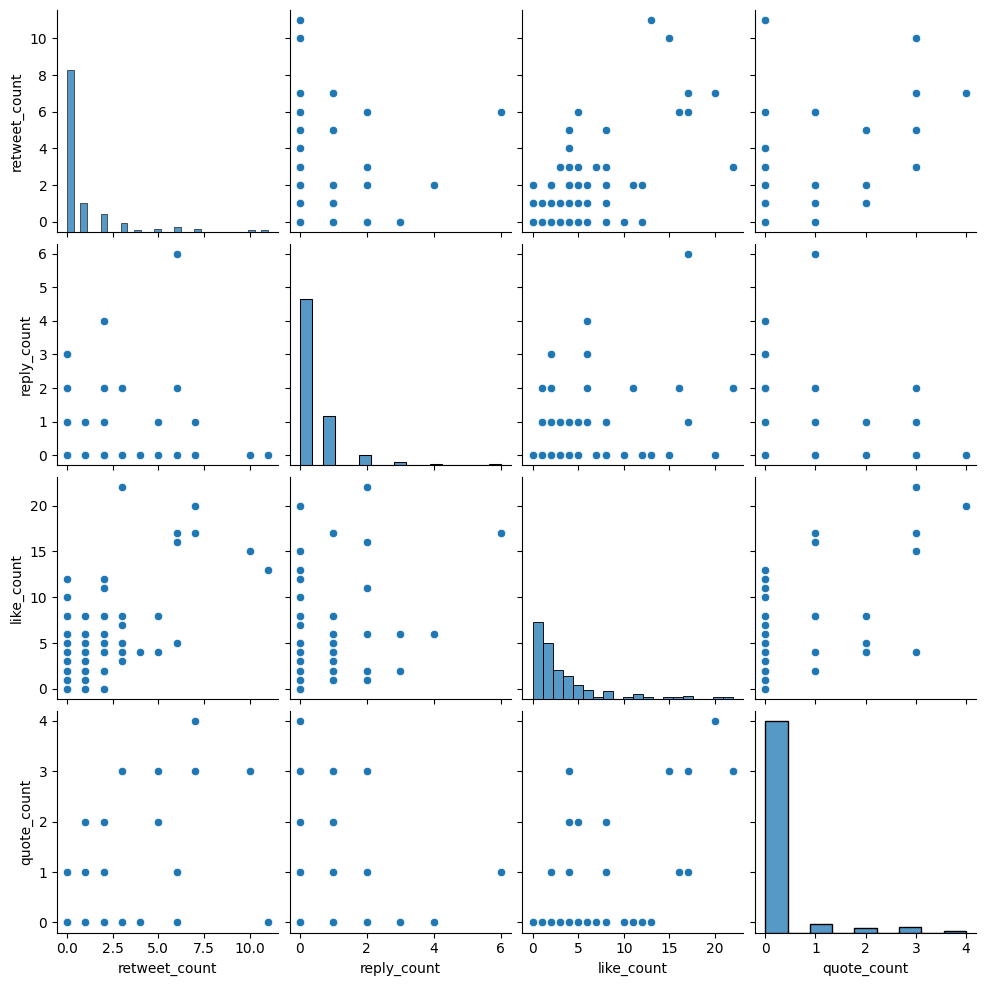

In [486]:
sns.pairplot(df_tweets[['retweet_count', 'reply_count', 'like_count', 'quote_count']])

<AxesSubplot:>

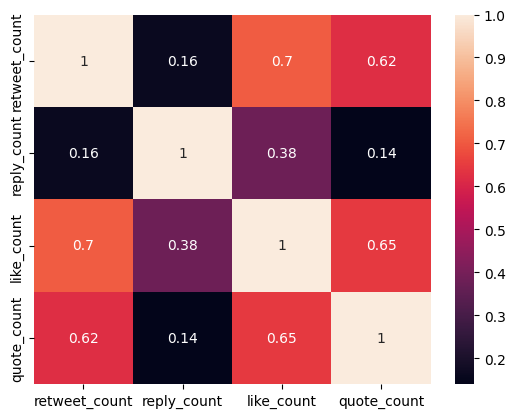

In [487]:
sns.heatmap(df_tweets[['retweet_count', 'reply_count', 'like_count', 'quote_count']].corr(), annot=True)

In [ ]:
def sql_query(query):

    # Ejecuta la query
    crsr.execute(query)

    # Almacena los datos de la query 
    ans = crsr.fetchall()

    # Obtenemos los nombres de las columnas de la tabla
    names = [description[0] for description in crsr.description]

    return pd.DataFrame(ans,columns=names)